In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

In [32]:
def gen_plot(x):
    plot = plt.plot(x)
    return plot

In [71]:
t = [[0, 1, 2, 2, 3, 2, 2, 1, 1, 3, 0]]
r = [[.9, .1, .2, .8, .888, .122, .256, .121, .976, .012, .777]]

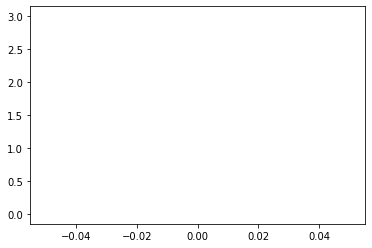

In [72]:
plt.plot(t)

In [73]:
cmap = 'Reds'
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

In [79]:
color_map = plt.get_cmap('Reds')

In [50]:
[mcmap(i) for i in r]

[(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886, 1.0),
 (0.9913725490196079, 0.7913725490196079, 0.7082352941176471, 1.0),
 (0.7364705882352941, 0.08, 0.10117647058823528, 1.0),
 (0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0),
 (0.9961860822760477, 0.8806920415224914, 0.8267589388696654, 1.0),
 (0.9882352941176471, 0.7270280661284121, 0.6241445597846982, 1.0),
 (0.9963091118800461, 0.883275663206459, 0.8304498269896193, 1.0),
 (0.4496885813148789, 0.011072664359861595, 0.05688581314878892, 1.0),
 (0.9996309111880046, 0.9530334486735871, 0.9301038062283737, 1.0),
 (0.7645213379469434, 0.08664359861591696, 0.10708189158016147, 1.0)]